# Цена дома в Нью Йорке

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme('notebook')

In [3]:
# знакомство с данными, предворительынй анализ
df = pd.read_csv('data/AB_NYC_2019.csv')
display(df.head())
df.info()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [24]:
# проверим данные на наличие пропусков
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [20]:
# первые два признака с отсутствующими значениями
# малоинформативны в рамках нашей задачи, опустим их
# проверим признаки last_review  и reviews_per_month

mask = df['last_review'] == None
df[mask]['reviews_per_month'].count()

0

In [28]:
# мы убедились, что пропуски в столбцах парные,
# проверим общее число обзоров, в зависимости от столбцов

mask = df['number_of_reviews'] == 0
df[mask].isnull().sum()/df[mask].shape[0] * 100

id                                  0.000000
name                                0.099483
host_id                             0.000000
host_name                           0.049741
neighbourhood_group                 0.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                       100.000000
reviews_per_month                 100.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
dtype: float64

In [35]:
# избавимся от пропусков
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['last_review'] = df['last_review'].fillna('Never')

In [36]:
df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

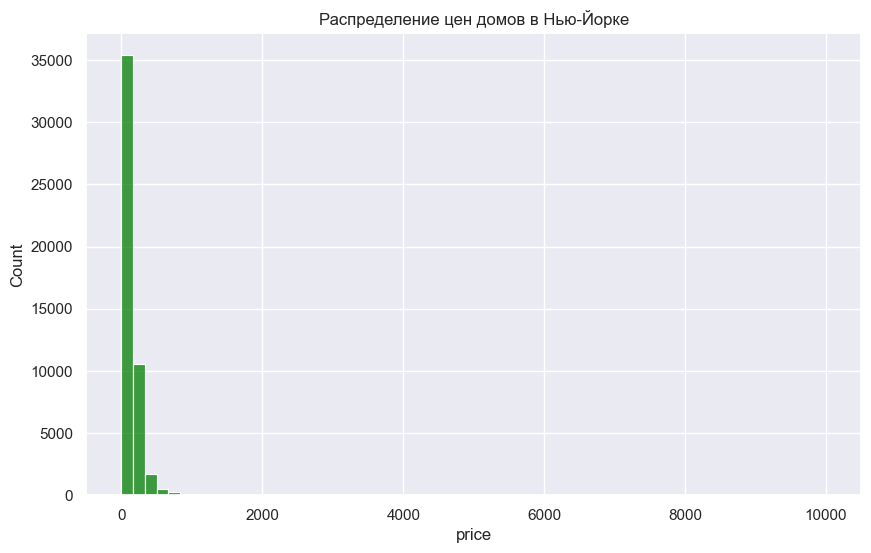

In [14]:
# посмотрим на распределение целевого признака
fig, axis = plt.subplots(figsize=(10,6))
sns.histplot(df['price'], bins = 60, color='green')
plt.title('Распределение цен домов в Нью-Йорке')
plt.show();

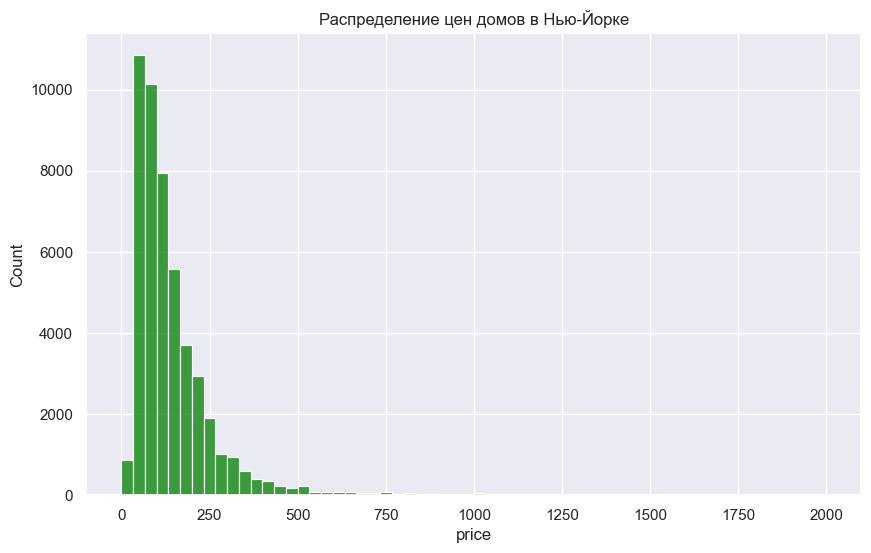

In [13]:
mask = df['price'] < 2000

fig, axis = plt.subplots(figsize=(10,6))
sns.histplot(df[mask]['price'], bins=60, color='green')
plt.title('Распределение цен домов в Нью-Йорке')
plt.show();

In [37]:
# отберем признаки для дальнейшей работы
columns = ['neighbourhood_group', 'neighbourhood', 'latitude',
           'longitude', 'room_type', 'minimum_nights',
           'number_of_reviews', 'last_review', 'reviews_per_month',
           'calculated_host_listings_count', 'availability_365']
data = df[columns]
y = df['price']